# Import Datas & Libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from scipy.stats import mode
from google.colab import files



In [49]:
uploaded = files.upload()
df= pd.read_csv('iris_dataset.csv')
df

Saving iris_dataset.csv to iris_dataset (2).csv


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


 # part 2:

In [50]:
X = df.iloc[:, :4]
Y = df['target']
Targetrange = range(df['target'].nunique())
classes = list(Targetrange)

# Part 3:

In [51]:
stats = {}
for cls in classes:
    mask = Y == cls
    cls_data = X[mask]
    stats[cls] = {
        'mean': cls_data.mean(),
        'variance': cls_data.var(),
        'min': cls_data.min(),
        'max': cls_data.max(),
        'range': cls_data.max() - cls_data.min()
    }

Show in table

In [52]:
stats_df = pd.DataFrame(stats).T
print(stats_df.round(2))
# Fixed construction for stats_df per feature (4 tables, one for each feature)
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

print("گام 3: آمار هر ویژگی در هر کلاس (4 جدول، هر کدام برای یک ویژگی)")
for feat in feature_names:
    # Extract stats for this feature across classes
    means = [stats[cls]['mean'][feat] for cls in classes]
    vars_ = [stats[cls]['variance'][feat] for cls in classes]
    mins = [stats[cls]['min'][feat] for cls in classes]
    maxs = [stats[cls]['max'][feat] for cls in classes]
    ranges = [stats[cls]['range'][feat] for cls in classes]

    # Create small DF for this feature
    feat_df = pd.DataFrame({
        'Class': classes,
        'mean': means,
        'variance': vars_,
        'min': mins,
        'max': maxs,
        'range': ranges
    }).round(2)

    # Print with markdown table (خط‌کشی‌شده)
    print(f"\n--- جدول برای {feat} ---")
    print(feat_df.to_markdown(index=False, tablefmt="pipe"))

# Optional: Add space between tables
print("\n" + "="*50)

                                                mean  \
0  sepal length (cm)    5.006
sepal width (cm)   ...   
1  sepal length (cm)    5.936
sepal width (cm)   ...   
2  sepal length (cm)    6.588
sepal width (cm)   ...   

                                            variance  \
0  sepal length (cm)    0.124249
sepal width (cm)...   
1  sepal length (cm)    0.266433
sepal width (cm)...   
2  sepal length (cm)    0.404343
sepal width (cm)...   

                                                 min  \
0  sepal length (cm)    4.3
sepal width (cm)     ...   
1  sepal length (cm)    4.9
sepal width (cm)     ...   
2  sepal length (cm)    4.9
sepal width (cm)     ...   

                                                 max  \
0  sepal length (cm)    5.8
sepal width (cm)     ...   
1  sepal length (cm)    7.0
sepal width (cm)     ...   
2  sepal length (cm)    7.9
sepal width (cm)     ...   

                                               range  
0  sepal length (cm)    1.5
sepal width (cm) 

# Part 4 & 5:

In [53]:
def gaussian_prob(x, mu, sigma):
    if sigma == 0:
        return 0 if abs(x - mu) > 1e-6 else 1
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * ((x - mu) / sigma)**2)

In [54]:
feature_idx = 2
petal_length = X.iloc[:, feature_idx].values
probs = np.zeros((len(petal_length), 3))
for i in range(len(petal_length)):
    x = petal_length[i]
    for cls in classes:
        mu = stats[cls]['mean'][feature_idx]
        sigma = np.sqrt(stats[cls]['variance'][feature_idx])
        probs[i, cls] = gaussian_prob(x, mu, sigma)
pred_classes_length = np.argmax(probs, axis=1)

/tmp/ipython-input-1063897123.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu = stats[cls]['mean'][feature_idx]
/tmp/ipython-input-1063897123.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = np.sqrt(stats[cls]['variance'][feature_idx])


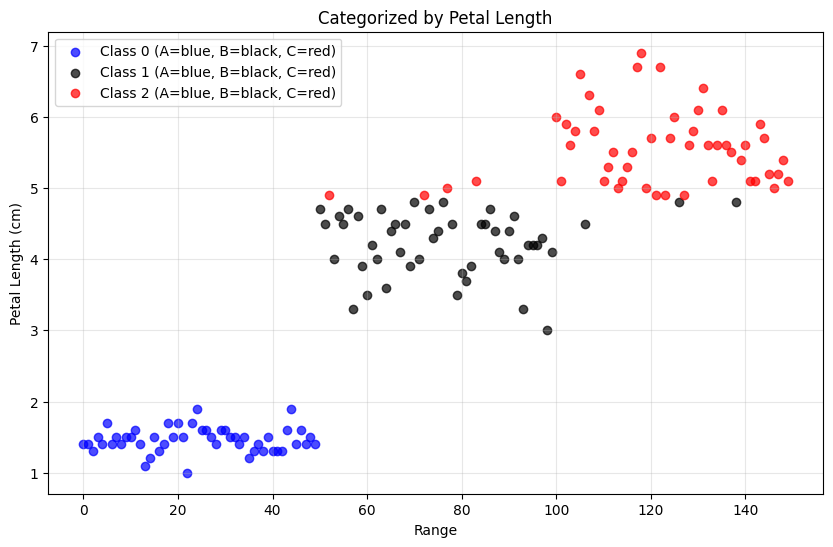

In [55]:
plt.figure(figsize=(10, 6))
colors = {0: 'blue', 1: 'black', 2: 'red'}
indices = np.arange(len(petal_length))
for cls in classes:
    mask = pred_classes_length == cls
    plt.scatter(indices[mask], petal_length[mask], c=colors[cls], label=f'Class {cls} (A=blue, B=black, C=red)', alpha=0.7)
plt.xlabel('Range')
plt.ylabel('Petal Length (cm)')
plt.title('Categorized by Petal Length')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [56]:
# accuracy_length = np.mean(pred_classes_length == Y.values) * 100
# print(f" accuracy by Petal Length: {accuracy_length:.2f}%")
correct_length = np.sum(pred_classes_length == Y.values)
wrong_length = len(Y) - correct_length
accuracy_length_train = (correct_length / (correct_length + wrong_length)) * 100 if (correct_length + wrong_length) > 0 else 0
print(f"accuracy by Petal Length : {accuracy_length_train:.2f}%")

accuracy by Petal Length : 95.33%


# Part 6 & 7:


In [57]:
uploaded_test = files.upload()
df_test = pd.read_csv('iris_test_samples.csv')

Saving iris_test_samples.csv to iris_test_samples (1).csv


In [60]:
X_test = df_test.iloc[:, :4]
Y_test = df_test['label']

In [68]:
petal_length_test = X_test.iloc[:, feature_idx].values
probs_test = np.zeros((len(petal_length_test), 3))
for i in range(len(petal_length_test)):
    x = petal_length_test[i]
    for cls in classes:
        mu = stats[cls]['mean'][feature_idx]
        sigma = np.sqrt(stats[cls]['variance'][feature_idx])
        probs_test[i, cls] = gaussian_prob(x, mu, sigma)

pred_classes_test_length = np.argmax(probs_test, axis=1)

/tmp/ipython-input-3046945274.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu = stats[cls]['mean'][feature_idx]
/tmp/ipython-input-3046945274.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = np.sqrt(stats[cls]['variance'][feature_idx])


In [69]:
accuracy_test_length = np.mean(pred_classes_test_length == Y_test.values) * 100
print(f"accuracy by Petal Length (test file): {accuracy_test_length:.2f}%")

accuracy by Petal Length (test file): 100.00%


# Part 8 & 9:

In [67]:
feature_idx_width = 3
petal_width_test = X_test.iloc[:, feature_idx_width].values
probs_width = np.zeros((len(petal_width_test), 3))
for i in range(len(petal_width_test)):
    x = petal_width_test[i]
    for cls in classes:
        mu = stats[cls]['mean'][feature_idx_width]
        sigma = np.sqrt(stats[cls]['variance'][feature_idx_width])
        probs_width[i, cls] = gaussian_prob(x, mu, sigma)

/tmp/ipython-input-2808718715.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu = stats[cls]['mean'][feature_idx_width]
/tmp/ipython-input-2808718715.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = np.sqrt(stats[cls]['variance'][feature_idx_width])


In [70]:
avg_probs = (probs_test + probs_width) / 2
pred_classes_avg = np.argmax(avg_probs, axis=1)

In [72]:
correct_avg = np.sum(pred_classes_avg == Y_test.values)
wrong_avg = len(Y_test) - correct_avg
accuracy_avg = (correct_avg / (correct_avg + wrong_avg)) * 100 if (correct_avg + wrong_avg) > 0 else 0
print(f"accuracy by Petal Length & Width (test): {accuracy_avg:.2f}%")

accuracy by Petal Length & Width (test): 100.00%


# Part 10: test file

In [79]:
probs_all = np.zeros((len(petal_width_test), 3, 4))
feature_indices = [0, 1, 2, 3]
for f_idx in feature_indices:
    feat_test = X_test.iloc[:, f_idx].values
    probs_f = np.zeros((len(feat_test), 3))
    for i in range(len(feat_test)):
        x = feat_test[i]
        for cls in classes:
            mu = stats[cls]['mean'][f_idx]
            sigma = np.sqrt(stats[cls]['variance'][f_idx])
            probs_f[i, cls] = gaussian_prob(x, mu, sigma)
    probs_all[:, :, f_idx] = probs_f

/tmp/ipython-input-2393440498.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu = stats[cls]['mean'][f_idx]  # از فایل اول
/tmp/ipython-input-2393440498.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = np.sqrt(stats[cls]['variance'][f_idx])  # از فایل اول


In [80]:
final_probs = np.zeros((len(petal_width_test), 3))
for i in range(len(petal_width_test)):
    for cls in classes:
        class_probs = probs_all[i, cls, :]
        top2 = np.sort(class_probs)[-2:]
        final_probs[i, cls] = np.mean(top2)

pred_classes_all = np.argmax(final_probs, axis=1)

In [83]:
correct_all = np.sum(pred_classes_all == Y_test.values)
wrong_all = len(Y_test) - correct_all
accuracy_all = (correct_all / (correct_all + wrong_all)) * 100 if (correct_all + wrong_all) > 0 else 0
print(f"Result of top 2 in file 2: {accuracy_all:.2f}%")

Result of top 2 in file 2: 100.00%


In [84]:
print(f"\nPrecision Petal Length: {accuracy_test_length:.2f}%")
print(f"Precision میانگین Length/Width: {accuracy_avg:.2f}%")
print(f"Precision تمام ویژگی‌ها (Top2): {accuracy_all:.2f}%")


Precision Petal Length: 100.00%
Precision میانگین Length/Width: 100.00%
Precision تمام ویژگی‌ها (Top2): 100.00%


# Part 10: Main file

In [86]:
df_train = pd.read_csv('iris_dataset.csv')
X_train_full = df_train.iloc[:, :4]
Y_train_full = df_train['target']

In [87]:
classes = [0, 1, 2]
stats = {}
for cls in classes:
    mask = Y_train_full == cls
    cls_data = X_train_full[mask]
    stats[cls] = {
        'mean': cls_data.mean(),
        'variance': cls_data.var(),
        'min': cls_data.min(),
        'max': cls_data.max(),
        'range': cls_data.max() - cls_data.min()
    }

In [88]:
petal_width_train = X_train_full.iloc[:, 3].values
probs_all = np.zeros((len(petal_width_train), 3, 4))
feature_indices = [0, 1, 2, 3]
for f_idx in feature_indices:
    feat_train = X_train_full.iloc[:, f_idx].values
    probs_f = np.zeros((len(feat_train), 3))
    for i in range(len(feat_train)):
        x = feat_train[i]
        for cls in classes:
            mu = stats[cls]['mean'][f_idx]
            sigma = np.sqrt(stats[cls]['variance'][f_idx])
            probs_f[i, cls] = gaussian_prob(x, mu, sigma)
    probs_all[:, :, f_idx] = probs_f

/tmp/ipython-input-2852424917.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu = stats[cls]['mean'][f_idx]
/tmp/ipython-input-2852424917.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = np.sqrt(stats[cls]['variance'][f_idx])


In [96]:
final_probs = np.zeros((len(petal_width_train), 3))
for i in range(len(petal_width_train)):
    for cls in classes:
        class_probs = probs_all[i, cls, :]
        top2 = np.sort(class_probs)[-2:]
        final_probs[i, cls] = np.mean(top2)

# print(final_probs)
pred_classes_all = np.argmax(final_probs, axis=1)
print(pred_classes_all)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 0 2
 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [92]:
correct_all = np.sum(pred_classes_all == Y_train_full.values)
wrong_all = len(Y_train_full) - correct_all
accuracy_all = (correct_all / (correct_all + wrong_all)) * 100 if (correct_all + wrong_all) > 0 else 0
print(f"Result for top 2 in all features(train - Main file): {accuracy_all:.2f}%")

Result for top 2 in all features(train - Main file): 93.33%
